# Rapport de projet : Planification du raccordement électrique

## 1. Contexte
Une tempête a endommagé les infrastructures électriques de la ville.  
L’objectif est de planifier le raccordement optimal des bâtiments pour minimiser les coûts.


In [21]:
# Import des bibliothèques nécessaires
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Désactiver les avertissements inutiles
import warnings
warnings.filterwarnings("ignore")

# Définir le chemin du dossier de données
data_path = "../data/"  # adapte si besoin

# 1️⃣ Charger les shapefiles des bâtiments et des infrastructures
batiments = gpd.read_file(data_path + "batiments.shp")
infrastructures = gpd.read_file(data_path + "infrastructures.shp")

# 2️⃣ Charger les fichiers Excels du réseau
reseau = pd.read_excel(data_path + "reseau_en_arbre.xlsx")
batiments_aj = pd.read_csv(data_path + "batiments.csv")
infra_aj = pd.read_csv(data_path + "infra.csv")

# ========================
# 3️⃣ Aperçu rapide
# ========================
print("=== Aperçu des données ===")
print("Bâtiments shapefile :", len(batiments))
print("Infrastructures shapefile :", len(infrastructures))
print("Réseau :", len(reseau))
print("Bâtiments ajoutés :", len(batiments_aj))
print("Infrastructures ajoutées :", len(infra_aj))
print("\nColonnes du réseau :", reseau.columns.tolist())

# Affichage rapide
display(batiments.head())
display(infrastructures.head())
display(reseau.head())
display(batiments_aj.head())
display(infra_aj.head())


=== Aperçu des données ===
Bâtiments shapefile : 381
Infrastructures shapefile : 644
Réseau : 6107
Bâtiments ajoutés : 381
Infrastructures ajoutées : 644

Colonnes du réseau : ['id_batiment', 'nb_maisons', 'infra_id', 'infra_type', 'longueur']


,id_bat,nb_maisons,geometry
0,E000270,1.0,POINT (531436.652 259655.507)
1,E000010,1.0,POINT (531445.663 259480.504)
2,E000060,1.0,POINT (531529.658 259588.506)
3,E000200,1.0,POINT (531217.642 259637.504)
4,E000249,1.0,POINT (531369.649 259611.505)


,infra_id,longueur,geometry
0,P007320,5.495148,"LINESTRING (531440.661 259482.497, 531436.99 2..."
1,P000352,3.332987,"LINESTRING (531433.814 259487.594, 531436.99 2..."
2,P007286,7.275098,"LINESTRING (531438.662 259479.506, 531436.99 2..."
3,P007115,10.593967,"LINESTRING (531445.663 259480.504, 531436.99 2..."
4,P007321,12.814338,"LINESTRING (531447.665 259479.5, 531436.99 259..."


,id_batiment,nb_maisons,infra_id,infra_type,longueur
0,E000001,4,P007111,infra_intacte,12.314461
1,E000001,4,P007983,infra_intacte,40.320929
2,E000001,4,P000308,infra_intacte,39.140799
3,E000001,4,P007819,infra_intacte,17.390464
4,E000002,1,P007111,infra_intacte,12.314461


,id_batiment,type_batiment,nb_maisons
0,E000160,habitation,8
1,E000367,habitation,3
2,E000032,habitation,1
3,E000017,habitation,7
4,E000339,habitation,1


,id_infra,type_infra
0,P000719,aerien
1,P007118,aerien
2,P007170,fourreau
3,P007648,aerien
4,P000306,aerien


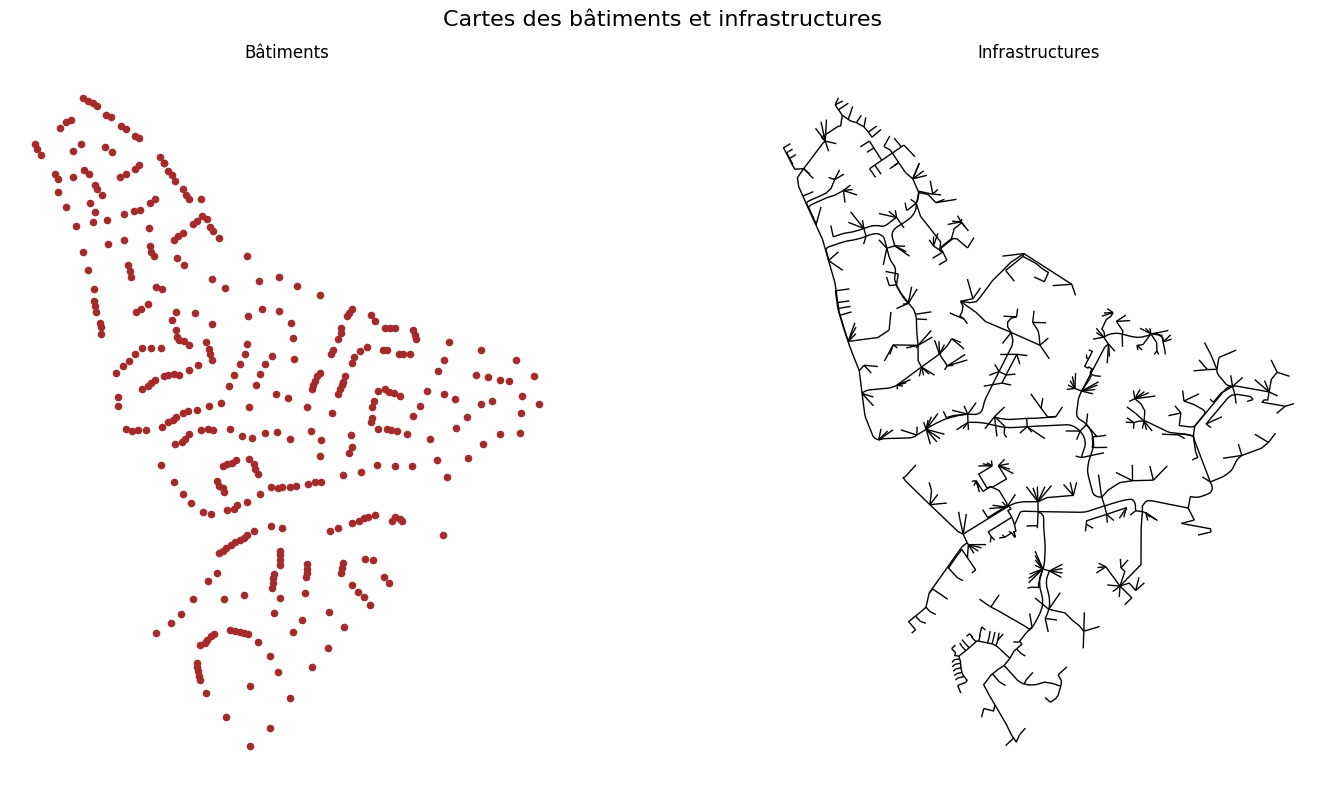

In [7]:
# Import
import matplotlib.pyplot as plt

# Créer 2 sous-graphes : 1 ligne, 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 ligne, 2 colonnes

# ========================
# Carte 1 : Bâtiments
# ========================
batiments.plot(ax=axes[0], color="brown", markersize=20)
axes[0].set_title("Bâtiments")
axes[0].axis('off')  # enlève les axes pour plus de clarté

# ========================
# Carte 2 : Infrastructures
# ========================
infrastructures.plot(ax=axes[1], color="black", linewidth=1)
axes[1].set_title("Infrastructures")
axes[1].axis('off')

# Affichage final
plt.suptitle("Cartes des bâtiments et infrastructures", fontsize=16)
plt.tight_layout()
plt.show()


## Fusions des tables et couches 

===== Statistiques Bâtiments =====
Nombre total de bâtiments : 381
Nombre total de maisons : 389.0

Statistiques descriptives sur le nombre de maisons par bâtiment :


count    381.000000
mean       1.020997
std        0.239693
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: nb_maisons, dtype: float64


===== Statistiques Infrastructures =====
Nombre total de lignes : 644
Longueur totale du réseau : 9208.059493962439

Statistiques descriptives sur la longueur des lignes :


count    644.000000
mean      14.298229
std       11.752216
min        0.372684
25%        7.597647
50%       10.913985
75%       15.599570
max       76.985593
Name: longueur, dtype: float64

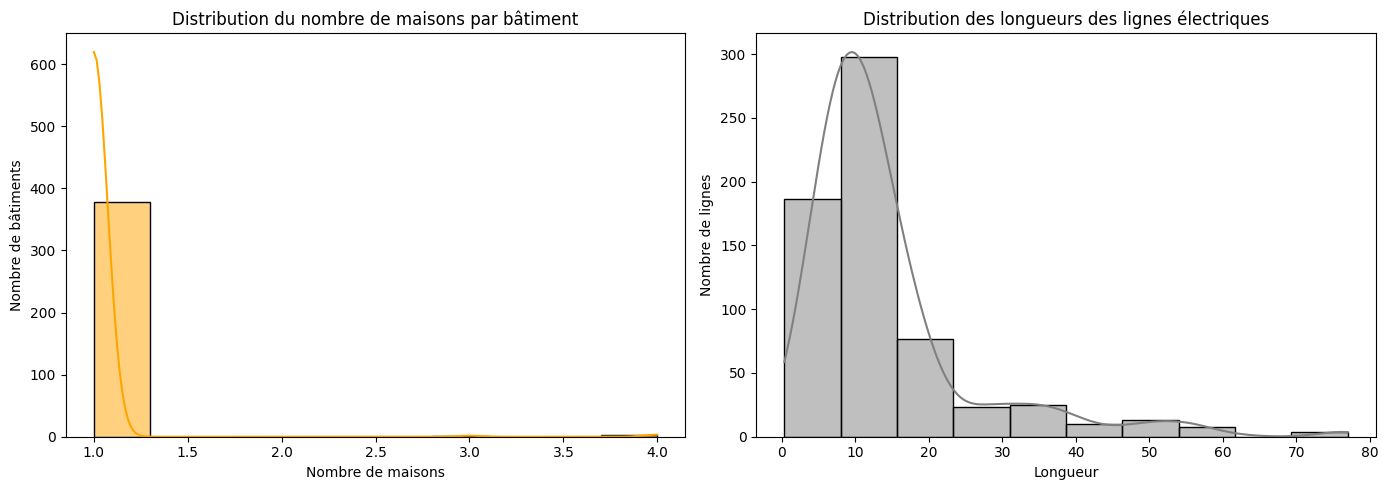


Nombre de bâtiments avec plus d'une maison : 3
Longueur moyenne par ligne : 14.30


In [ ]:
# ========================
# 1️⃣ Statistiques sur les bâtiments
# ========================
import sys


print("===== Statistiques Bâtiments =====")
print("Nombre total de bâtiments :", len(batiments))
print("Nombre total de maisons :", batiments["nb_maisons"].sum())
print("\nStatistiques descriptives sur le nombre de maisons par bâtiment :")
display(batiments["nb_maisons"].describe())

# ========================
# 2️⃣ Statistiques sur les infrastructures
# ========================
print("\n===== Statistiques Infrastructures =====")
print("Nombre total de lignes :", len(infrastructures))
print("Longueur totale du réseau :", infrastructures["longueur"].sum())
print("\nStatistiques descriptives sur la longueur des lignes :")
display(infrastructures["longueur"].describe())

# ========================
# 3️⃣ Histogrammes côte à côte
# ========================
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Histogramme nb_maisons
sys.histplot(batiments["nb_maisons"], bins=10, kde=True, color="orange", ax=axes[0])
axes[0].set_title("Distribution du nombre de maisons par bâtiment")
axes[0].set_xlabel("Nombre de maisons")
axes[0].set_ylabel("Nombre de bâtiments")

# Histogramme longueur
sns.histplot(infrastructures["longueur"], bins=10, kde=True, color="gray", ax=axes[1])
axes[1].set_title("Distribution des longueurs des lignes électriques")
axes[1].set_xlabel("Longueur")
axes[1].set_ylabel("Nombre de lignes")

plt.tight_layout()
plt.show()

# ========================
# 4️⃣ Statistiques supplémentaires optionnelles
# ========================
# Nombre de bâtiments ayant plus d'une maison
nb_plusieurs_maisons = (batiments["nb_maisons"] > 1).sum()
print(f"\nNombre de bâtiments avec plus d'une maison : {nb_plusieurs_maisons}")

# Longueur moyenne par ligne
longueur_moyenne = infrastructures["longueur"].mean()
print(f"Longueur moyenne par ligne : {longueur_moyenne:.2f}")

===== Statistiques générales =====
       id_batiment   nb_maisons infra_id     infra_type     longueur
count         6107  6107.000000     6107           6107  6107.000000
unique         381          NaN      644              2          NaN
top        E000381          NaN  P007111  infra_intacte          NaN
freq            30          NaN      414           5530          NaN
mean           NaN     1.016211      NaN            NaN    29.314081
std            NaN     0.203714      NaN            NaN    21.681575
min            NaN     1.000000      NaN            NaN     0.372684
25%            NaN     1.000000      NaN            NaN     8.476727
50%            NaN     1.000000      NaN            NaN    27.771443
75%            NaN     1.000000      NaN            NaN    49.956115
max            NaN     4.000000      NaN            NaN    76.985593
infra_intacte : 5530 infrastructures
a_remplacer : 577 infrastructures


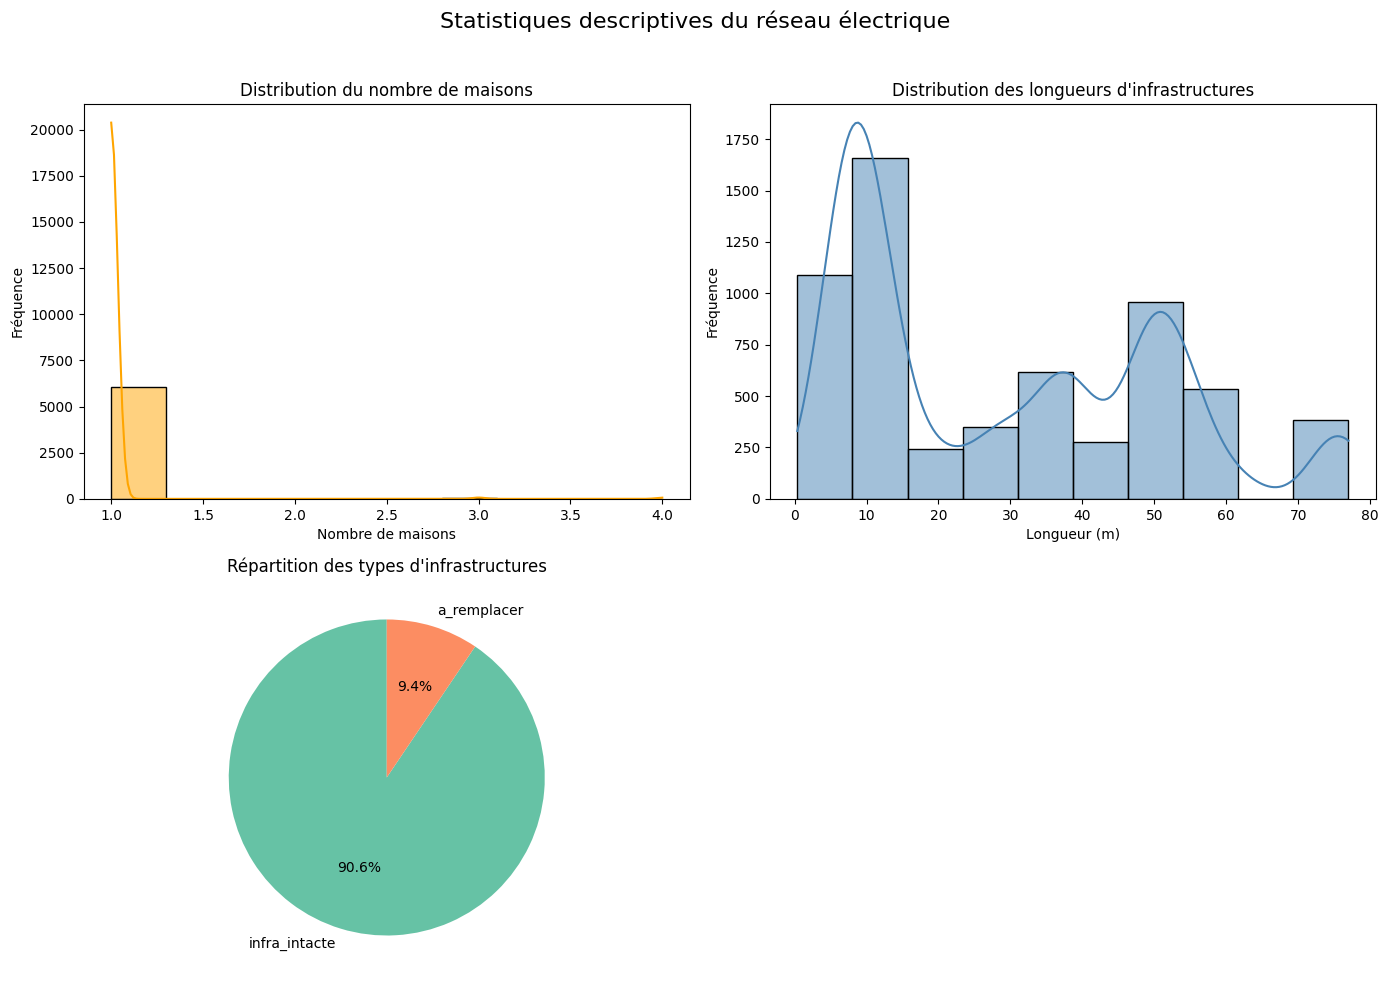

In [10]:
# ========================
# Statistiques générales
# ========================
print("===== Statistiques générales =====")
print(reseau.describe(include='all'))

# ========================
# Visualisations 2x2 (avec 3 graphes)
# ========================
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# --- Graphique 1 : Distribution du nombre de maisons ---
sns.histplot(reseau["nb_maisons"], bins=10, kde=True, color="orange", ax=axes[0,0])
axes[0,0].set_title("Distribution du nombre de maisons")
axes[0,0].set_xlabel("Nombre de maisons")
axes[0,0].set_ylabel("Fréquence")

# --- Graphique 2 : Distribution des longueurs d'infrastructures ---
sns.histplot(reseau["longueur"], bins=10, kde=True, color="steelblue", ax=axes[0,1])
axes[0,1].set_title("Distribution des longueurs d'infrastructures")
axes[0,1].set_xlabel("Longueur (m)")
axes[0,1].set_ylabel("Fréquence")

# --- Graphique 3 : Répartition par type d'infrastructure (pie chart) ---
infra_counts = reseau["infra_type"].value_counts()
infra_labels = infra_counts.index
infra_values = infra_counts.values

# Pie chart
axes[1,0].pie(
    infra_values,
    labels=infra_labels,
    autopct='%1.1f%%',         # pourcentages avec une décimale
    startangle=90,             # angle de départ
    colors=sns.color_palette("Set2", len(infra_labels)),
    textprops={'fontsize': 10}
)
axes[1,0].set_title("Répartition des types d'infrastructures")

# Ajouter les chiffres exacts à côté du camembert
for i, (label, value) in enumerate(zip(infra_labels, infra_values)):
    print(f"{label} : {value} infrastructures")

# --- Case vide en bas à droite (désactivée) ---
axes[1,1].axis("off")

# --- Mise en forme globale ---
plt.suptitle("Statistiques descriptives du réseau électrique", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [11]:
# Vérifier les colonnes disponibles
print("Colonnes dans infrastructures :", infrastructures.columns.tolist())
print("Colonnes dans le fichier Excel :", reseau.columns.tolist())

# ========================
# 1️⃣ Vérification des clés avant jointure
# ========================
print("\nExemples d'infra_id dans les shapefiles :", infrastructures["infra_id"].head())
print("Exemples d'infra_id dans le fichier Excel :", reseau["infra_id"].head())

# Vérifier s’il y a des infra_id manquants ou incohérents
nb_match = infrastructures["infra_id"].isin(reseau["infra_id"]).sum()
print(f"\n{nb_match}/{len(infrastructures)} identifiants 'infra_id' trouvés dans le fichier Excel.")

# ========================
# 2️⃣ Fusion (jointure attributaire)
# ========================
infra_merged = infrastructures.merge(
    reseau[["infra_id", "infra_type", "longueur"]],   # colonnes à récupérer
    on="infra_id", 
    how="left"                                        # garde toutes les lignes de la couche géographique
)

# ========================
# 3️⃣ Vérification du résultat
# ========================
print("\nAperçu de la couche fusionnée :")
display(infra_merged.head())

print("\nColonnes après fusion :", infra_merged.columns.tolist())

# ========================
# 4️⃣ Sauvegarde de la couche fusionnée (si besoin)
# ========================
output_path = data_path + "infrastructures_fusionnee.shp"
infra_merged.to_file(output_path)
print(f"\n✅ Nouvelle couche enregistrée : {output_path}")

Colonnes dans infrastructures : ['infra_id', 'longueur', 'geometry']
Colonnes dans le fichier Excel : ['id_batiment', 'nb_maisons', 'infra_id', 'infra_type', 'longueur']

Exemples d'infra_id dans les shapefiles : 0    P007320
1    P000352
2    P007286
3    P007115
4    P007321
Name: infra_id, dtype: object
Exemples d'infra_id dans le fichier Excel : 0    P007111
1    P007983
2    P000308
3    P007819
4    P007111
Name: infra_id, dtype: object

644/644 identifiants 'infra_id' trouvés dans le fichier Excel.

Aperçu de la couche fusionnée :


,infra_id,longueur_x,geometry,infra_type,longueur_y
0,P007320,5.495148,"LINESTRING (531440.661 259482.497, 531436.99 2...",infra_intacte,5.495148
1,P000352,3.332987,"LINESTRING (531433.814 259487.594, 531436.99 2...",infra_intacte,3.332987
2,P000352,3.332987,"LINESTRING (531433.814 259487.594, 531436.99 2...",infra_intacte,3.332987
3,P000352,3.332987,"LINESTRING (531433.814 259487.594, 531436.99 2...",infra_intacte,3.332987
4,P000352,3.332987,"LINESTRING (531433.814 259487.594, 531436.99 2...",infra_intacte,3.332987



Colonnes après fusion : ['infra_id', 'longueur_x', 'geometry', 'infra_type', 'longueur_y']

✅ Nouvelle couche enregistrée : ../data/infrastructures_fusionnee.shp


Colonnes disponibles : ['infra_id', 'longueur_x', 'infra_type', 'longueur_y', 'geometry']
Types d'infrastructures : ['infra_intacte' 'a_remplacer']


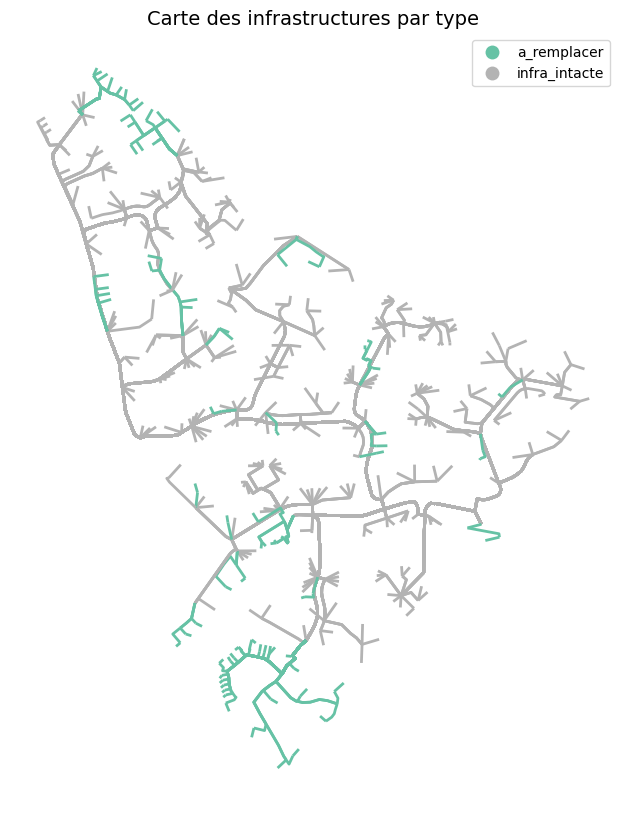

In [12]:
# Charger la couche fusionnée
data_path = "../data/"
infra_merged = gpd.read_file(data_path + "infrastructures_fusionnee.shp")

# Vérifier les colonnes
print("Colonnes disponibles :", infra_merged.columns.tolist())
print("Types d'infrastructures :", infra_merged["infra_type"].unique())

# ========================
# 1️⃣ Carte des infrastructures selon leur type
# ========================
fig, ax = plt.subplots(figsize=(10, 10))

# Palette de couleurs adaptée au nombre de types d'infra
unique_types = infra_merged["infra_type"].nunique()
palette = sns.color_palette("Set2", unique_types)

# Tracé coloré selon le type d’infrastructure
infra_merged.plot(
    ax=ax,
    column="infra_type",
    cmap="Set2",         # Palette de couleur
    legend=True,
    linewidth=2
)

ax.set_title("Carte des infrastructures par type", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.axis('off')

plt.show()